# Linear Classification

In [1]:
# Install Tensorflow
# direct tensorflow installation throws tensorboard version error on my env
# so install tensorboard 2.0.0 first
# ! pip install tensorboard==2.0.0
# ! pip install tensorflow==2.0.0

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [4]:
# Load in the data
from sklearn.datasets import load_breast_cancer

In [5]:
# load the data
data = load_breast_cancer()

In [6]:
# check the type of 'data'
type(data)

sklearn.utils.Bunch

In [7]:
# note: it is a Bunch object
# this basically acts like a dictionary where you can treat the keys lie attributes
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
# 'data' (the attribute) means the inout data
data.data.shape
# it has 569 samples, 30 features

(569, 30)

In [9]:
# 'targets'
data.target
# note how the targets are just 0s and 1s
# normally, when you have K targets, they are labeled 0..K-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
# their meaning is not lost
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
# here are also 569 corresponding targets
data.target.shape

(569,)

In [12]:
# you can also determine the meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
# normally we would put all of our imports at the top
# but this lets us tell a story
from sklearn.model_selection import train_test_split

# split the data into train and test sets
# this lets us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [14]:
# Scale the data
# you'll learn why scaling is needed in a later course
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

![title](images/3-3-1.png)

In [15]:
# Now all the fun Tensorflow stuff
# Build the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Alternatively, you can do:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)

# Evalute the model - evaluate() returns loass and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Train on 381 samples, validate on 188 samples
Epoch 1/500
381/381 [==============================] - 1s 1ms/sample - loss: 0.7794 - accuracy: 0.5827 - val_loss: 0.6841 - val_accuracy: 0.6383
Epoch 2/500
381/381 [==============================] - 0s 114us/sample - loss: 0.7195 - accuracy: 0.6194 - val_loss: 0.6233 - val_accuracy: 0.6702
Epoch 3/500
381/381 [==============================] - 0s 108us/sample - loss: 0.6666 - accuracy: 0.6640 - val_loss: 0.5704 - val_accuracy: 0.6915
Epoch 4/500
381/381 [==============================] - 0s 109us/sample - loss: 0.6190 - accuracy: 0.6955 - val_loss: 0.5266 - val_accuracy: 0.7447
Epoch 5/500
381/381 [==============================] - 0s 108us/sample - loss: 0.5791 - accuracy: 0.7192 - val_loss: 0.4881 - val_accuracy: 0.7660
Epoch 6/500
381/381 [==============================] - 0s 116us/sample - loss: 0.5427 - accuracy: 0.7375 - val_loss: 0.4560 - val_accuracy: 0.7872
Epoch 7/500
381/381 [==============================] - 0s 112us/sample - l

Epoch 56/500
381/381 [==============================] - 0s 106us/sample - loss: 0.1526 - accuracy: 0.9528 - val_loss: 0.1236 - val_accuracy: 0.9734
Epoch 57/500
381/381 [==============================] - 0s 108us/sample - loss: 0.1509 - accuracy: 0.9528 - val_loss: 0.1223 - val_accuracy: 0.9734
Epoch 58/500
381/381 [==============================] - 0s 107us/sample - loss: 0.1494 - accuracy: 0.9528 - val_loss: 0.1211 - val_accuracy: 0.9734
Epoch 59/500
381/381 [==============================] - 0s 117us/sample - loss: 0.1478 - accuracy: 0.9528 - val_loss: 0.1199 - val_accuracy: 0.9734
Epoch 60/500
381/381 [==============================] - 0s 112us/sample - loss: 0.1464 - accuracy: 0.9528 - val_loss: 0.1187 - val_accuracy: 0.9734
Epoch 61/500
381/381 [==============================] - 0s 111us/sample - loss: 0.1449 - accuracy: 0.9528 - val_loss: 0.1175 - val_accuracy: 0.9734
Epoch 62/500
381/381 [==============================] - 0s 119us/sample - loss: 0.1435 - accuracy: 0.9580 - val_

381/381 [==============================] - 0s 107us/sample - loss: 0.1025 - accuracy: 0.9711 - val_loss: 0.0865 - val_accuracy: 0.9787
Epoch 112/500
381/381 [==============================] - 0s 111us/sample - loss: 0.1020 - accuracy: 0.9711 - val_loss: 0.0861 - val_accuracy: 0.9787
Epoch 113/500
381/381 [==============================] - 0s 117us/sample - loss: 0.1015 - accuracy: 0.9711 - val_loss: 0.0857 - val_accuracy: 0.9787
Epoch 114/500
381/381 [==============================] - 0s 110us/sample - loss: 0.1011 - accuracy: 0.9711 - val_loss: 0.0854 - val_accuracy: 0.9787
Epoch 115/500
381/381 [==============================] - 0s 114us/sample - loss: 0.1005 - accuracy: 0.9711 - val_loss: 0.0850 - val_accuracy: 0.9787
Epoch 116/500
381/381 [==============================] - 0s 110us/sample - loss: 0.1001 - accuracy: 0.9711 - val_loss: 0.0848 - val_accuracy: 0.9787
Epoch 117/500
381/381 [==============================] - 0s 111us/sample - loss: 0.0996 - accuracy: 0.9711 - val_loss: 0

381/381 [==============================] - 0s 106us/sample - loss: 0.0829 - accuracy: 0.9869 - val_loss: 0.0731 - val_accuracy: 0.9787
Epoch 167/500
381/381 [==============================] - 0s 109us/sample - loss: 0.0826 - accuracy: 0.9869 - val_loss: 0.0730 - val_accuracy: 0.9787
Epoch 168/500
381/381 [==============================] - 0s 109us/sample - loss: 0.0824 - accuracy: 0.9869 - val_loss: 0.0728 - val_accuracy: 0.9787
Epoch 169/500
381/381 [==============================] - 0s 114us/sample - loss: 0.0822 - accuracy: 0.9869 - val_loss: 0.0727 - val_accuracy: 0.9787
Epoch 170/500
381/381 [==============================] - 0s 105us/sample - loss: 0.0819 - accuracy: 0.9869 - val_loss: 0.0725 - val_accuracy: 0.9787
Epoch 171/500
381/381 [==============================] - 0s 114us/sample - loss: 0.0817 - accuracy: 0.9869 - val_loss: 0.0723 - val_accuracy: 0.9787
Epoch 172/500
381/381 [==============================] - 0s 107us/sample - loss: 0.0814 - accuracy: 0.9869 - val_loss: 0

381/381 [==============================] - 0s 120us/sample - loss: 0.0722 - accuracy: 0.9869 - val_loss: 0.0661 - val_accuracy: 0.9787
Epoch 222/500
381/381 [==============================] - 0s 114us/sample - loss: 0.0721 - accuracy: 0.9869 - val_loss: 0.0661 - val_accuracy: 0.9787
Epoch 223/500
381/381 [==============================] - 0s 119us/sample - loss: 0.0719 - accuracy: 0.9869 - val_loss: 0.0660 - val_accuracy: 0.9787
Epoch 224/500
381/381 [==============================] - 0s 115us/sample - loss: 0.0718 - accuracy: 0.9869 - val_loss: 0.0658 - val_accuracy: 0.9787
Epoch 225/500
381/381 [==============================] - 0s 118us/sample - loss: 0.0717 - accuracy: 0.9869 - val_loss: 0.0658 - val_accuracy: 0.9787
Epoch 226/500
381/381 [==============================] - 0s 115us/sample - loss: 0.0715 - accuracy: 0.9869 - val_loss: 0.0656 - val_accuracy: 0.9787
Epoch 227/500
381/381 [==============================] - 0s 114us/sample - loss: 0.0714 - accuracy: 0.9869 - val_loss: 0

381/381 [==============================] - 0s 112us/sample - loss: 0.0655 - accuracy: 0.9869 - val_loss: 0.0618 - val_accuracy: 0.9840
Epoch 277/500
381/381 [==============================] - 0s 122us/sample - loss: 0.0655 - accuracy: 0.9869 - val_loss: 0.0618 - val_accuracy: 0.9840
Epoch 278/500
381/381 [==============================] - 0s 120us/sample - loss: 0.0653 - accuracy: 0.9869 - val_loss: 0.0617 - val_accuracy: 0.9840
Epoch 279/500
381/381 [==============================] - 0s 129us/sample - loss: 0.0653 - accuracy: 0.9869 - val_loss: 0.0616 - val_accuracy: 0.9840
Epoch 280/500
381/381 [==============================] - 0s 135us/sample - loss: 0.0652 - accuracy: 0.9869 - val_loss: 0.0616 - val_accuracy: 0.9840
Epoch 281/500
381/381 [==============================] - 0s 131us/sample - loss: 0.0651 - accuracy: 0.9869 - val_loss: 0.0616 - val_accuracy: 0.9840
Epoch 282/500
381/381 [==============================] - 0s 133us/sample - loss: 0.0650 - accuracy: 0.9869 - val_loss: 0

381/381 [==============================] - 0s 119us/sample - loss: 0.0610 - accuracy: 0.9869 - val_loss: 0.0591 - val_accuracy: 0.9894
Epoch 332/500
381/381 [==============================] - 0s 120us/sample - loss: 0.0609 - accuracy: 0.9869 - val_loss: 0.0590 - val_accuracy: 0.9894
Epoch 333/500
381/381 [==============================] - 0s 126us/sample - loss: 0.0609 - accuracy: 0.9869 - val_loss: 0.0590 - val_accuracy: 0.9894
Epoch 334/500
381/381 [==============================] - 0s 120us/sample - loss: 0.0608 - accuracy: 0.9869 - val_loss: 0.0589 - val_accuracy: 0.9894
Epoch 335/500
381/381 [==============================] - 0s 115us/sample - loss: 0.0607 - accuracy: 0.9869 - val_loss: 0.0589 - val_accuracy: 0.9894
Epoch 336/500
381/381 [==============================] - 0s 116us/sample - loss: 0.0607 - accuracy: 0.9869 - val_loss: 0.0589 - val_accuracy: 0.9894
Epoch 337/500
381/381 [==============================] - 0s 125us/sample - loss: 0.0606 - accuracy: 0.9869 - val_loss: 0

381/381 [==============================] - 0s 125us/sample - loss: 0.0578 - accuracy: 0.9869 - val_loss: 0.0572 - val_accuracy: 0.9894
Epoch 387/500
381/381 [==============================] - 0s 123us/sample - loss: 0.0577 - accuracy: 0.9869 - val_loss: 0.0572 - val_accuracy: 0.9894
Epoch 388/500
381/381 [==============================] - 0s 122us/sample - loss: 0.0577 - accuracy: 0.9869 - val_loss: 0.0572 - val_accuracy: 0.9894
Epoch 389/500
381/381 [==============================] - 0s 121us/sample - loss: 0.0576 - accuracy: 0.9895 - val_loss: 0.0572 - val_accuracy: 0.9894
Epoch 390/500
381/381 [==============================] - 0s 119us/sample - loss: 0.0575 - accuracy: 0.9895 - val_loss: 0.0572 - val_accuracy: 0.9894
Epoch 391/500
381/381 [==============================] - 0s 121us/sample - loss: 0.0575 - accuracy: 0.9895 - val_loss: 0.0572 - val_accuracy: 0.9894
Epoch 392/500
381/381 [==============================] - 0s 119us/sample - loss: 0.0575 - accuracy: 0.9895 - val_loss: 0

381/381 [==============================] - 0s 116us/sample - loss: 0.0554 - accuracy: 0.9895 - val_loss: 0.0562 - val_accuracy: 0.9894
Epoch 442/500
381/381 [==============================] - 0s 118us/sample - loss: 0.0554 - accuracy: 0.9895 - val_loss: 0.0561 - val_accuracy: 0.9894
Epoch 443/500
381/381 [==============================] - 0s 116us/sample - loss: 0.0553 - accuracy: 0.9895 - val_loss: 0.0561 - val_accuracy: 0.9894
Epoch 444/500
381/381 [==============================] - 0s 110us/sample - loss: 0.0553 - accuracy: 0.9895 - val_loss: 0.0561 - val_accuracy: 0.9894
Epoch 445/500
381/381 [==============================] - 0s 116us/sample - loss: 0.0552 - accuracy: 0.9895 - val_loss: 0.0560 - val_accuracy: 0.9894
Epoch 446/500
381/381 [==============================] - 0s 107us/sample - loss: 0.0552 - accuracy: 0.9895 - val_loss: 0.0560 - val_accuracy: 0.9894
Epoch 447/500
381/381 [==============================] - 0s 110us/sample - loss: 0.0551 - accuracy: 0.9895 - val_loss: 0

381/381 [==============================] - 0s 117us/sample - loss: 0.0535 - accuracy: 0.9895 - val_loss: 0.0553 - val_accuracy: 0.9894
Epoch 497/500
381/381 [==============================] - 0s 127us/sample - loss: 0.0535 - accuracy: 0.9895 - val_loss: 0.0553 - val_accuracy: 0.9894
Epoch 498/500
381/381 [==============================] - 0s 115us/sample - loss: 0.0535 - accuracy: 0.9895 - val_loss: 0.0553 - val_accuracy: 0.9894
Epoch 499/500
381/381 [==============================] - 0s 112us/sample - loss: 0.0535 - accuracy: 0.9895 - val_loss: 0.0552 - val_accuracy: 0.9894
Epoch 500/500
381/381 [==============================] - 0s 116us/sample - loss: 0.0535 - accuracy: 0.9895 - val_loss: 0.0553 - val_accuracy: 0.9894
381/1 [======================================================================================================================================================================================================================================================================

Train score: [0.05336851798721499, 0.9895013]
188/1 [===================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

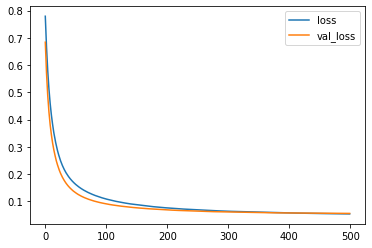

In [17]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

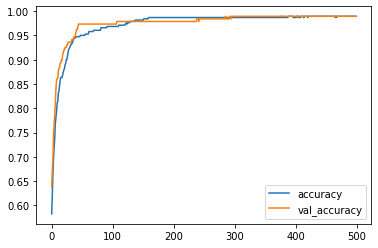

In [18]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [19]:
# Make predictions
P = model.predict(X_test)
print(P) # they are ooutputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

[[0.0000000e+00]
 [9.9999917e-01]
 [1.7881393e-07]
 [3.6525995e-02]
 [9.9988878e-01]
 [9.9984515e-01]
 [9.8787963e-01]
 [9.7526121e-01]
 [6.2584877e-07]
 [9.6539676e-01]
 [6.9772565e-01]
 [2.7333498e-03]
 [9.9481207e-01]
 [9.9999559e-01]
 [9.9947548e-01]
 [1.6987324e-06]
 [0.0000000e+00]
 [0.0000000e+00]
 [9.9999726e-01]
 [9.9991286e-01]
 [9.9998951e-01]
 [9.9440372e-01]
 [7.6265603e-02]
 [9.9907959e-01]
 [9.4322473e-01]
 [9.9916905e-01]
 [9.9958432e-01]
 [1.4901161e-07]
 [1.3639331e-03]
 [9.9999905e-01]
 [5.9604645e-08]
 [9.9922824e-01]
 [5.4299831e-05]
 [6.1298925e-01]
 [1.4901161e-06]
 [5.2551001e-01]
 [9.3884826e-01]
 [8.9388072e-01]
 [9.6900016e-01]
 [0.0000000e+00]
 [0.0000000e+00]
 [2.1338463e-05]
 [9.9999881e-01]
 [2.9802322e-08]
 [9.9991727e-01]
 [8.6128712e-06]
 [9.9150550e-01]
 [0.0000000e+00]
 [9.9989104e-01]
 [9.9971211e-01]
 [0.0000000e+00]
 [9.9998957e-01]
 [0.0000000e+00]
 [9.9401593e-01]
 [0.0000000e+00]
 [8.1055284e-01]
 [9.9998796e-01]
 [9.9975729e-01]
 [9.9972147e-0